In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [ ]:
df=pd.read_csv('/content/Worlds Best 50 Hotels.csv',
encoding='ISO-8859-1', header=0)


In [ ]:
df.head()
print(df.head())

   Rank                Name   Location  \
0     1     Capella Bangkok    Bangkok   
1     2         Passalacqua  Lake Como   
2     3  Rosewood Hong Kong  Hong Kong   
3     4        Cheval Blanc      Paris   
4     5     The Upper House  Hong Kong   

                                            Overview  Total Rooms  \
0  A calming riverside oasis in the centre of cac...          101   
1  A sumptuous Lake Como retreat made for enjoyin...           24   
2     Masterful minimalism meets marble-lined luxury          413   
3  Uber-stylish riverside luxury and world-class ...           72   
4               A temple of Zen high above Hong Kong          117   

   Starting Rate in ($)                               Dining Area  \
0                   600   Côte by Mauro Colagreco and Phra Nakhon   
1                  1300                        The Garden Terrace   
2                   650              Bluhouse and The Dining Room   
3                  3000                               La

In [ ]:
df.isna().sum()


,0
Rank,0
Name,0
Location,0
Overview,0
Total Rooms,0
Starting Rate in ($),0
Dining Area,0
Drinking Area,4
Hotel Ammenties,1
Address,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Rank                  50 non-null     int64 
 1   Name                  50 non-null     object
 2   Location              50 non-null     object
 3   Overview              50 non-null     object
 4   Total Rooms           50 non-null     int64 
 5   Starting Rate in ($)  50 non-null     int64 
 6   Dining Area           50 non-null     object
 7   Drinking Area         46 non-null     object
 8   Hotel Ammenties       49 non-null     object
 9   Address               50 non-null     object
 10  Number                48 non-null     object
dtypes: int64(3), object(8)
memory usage: 4.4+ KB


In [ ]:
df.describe(include ='int')

,Rank,Total Rooms,Starting Rate in ($)
count,50.00000,50.000000,50.000000
mean,25.50000,134.620000,1377.340000
std,14.57738,129.328231,853.332904
min,1.00000,12.000000,235.000000
25%,13.25000,52.250000,777.500000
50%,25.50000,104.000000,1200.000000
75%,37.75000,186.250000,1787.500000
max,50.00000,795.000000,4000.000000


In [ ]:
df.drop(columns='Number', axis=1, inplace=True)


In [ ]:
df.columns

Index(['Rank', 'Name', 'Location', 'Overview', 'Total Rooms',
       'Starting Rate in ($)', 'Dining Area', 'Drinking Area',
       'Hotel Ammenties', 'Address'],
      dtype='object')

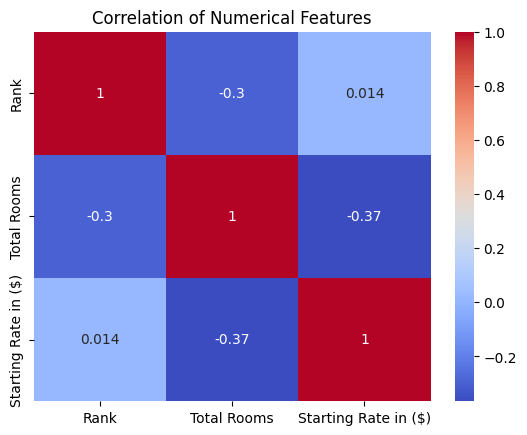

In [ ]:
numerical_features =df.select_dtypes(exclude=['object']).columns
Corr_matrix =df[numerical_features].corr()
sns.heatmap(Corr_matrix, annot=True, cmap='coolwarm')
pyplot.title('Correlation of Numerical Features')
pyplot.show()


In [ ]:
# Distribution of Hotels in differnet Location

Locations_counts= df['Location'].value_counts()
print(Locations_counts)

Location
Bangkok                 4
Paris                   3
London                  3
Dubai                   2
Marrakech               2
New York                2
Tokyo                   2
Singapore               2
Hong Kong               2
Hobart                  1
Tulum                   1
Tetiaroa                1
Kruger National Park    1
Rajasthan               1
Lisciano Niccone        1
Auchterarder            1
Galle                   1
St. Barths              1
Los Angeles             1
Surfside                1
Madrid                  1
Zaghi                   1
Kyoto                   1
Riviera Nayarit         1
Cape Town               1
Lake Como               1
Brisbane                1
São Paulo               1
Bali                    1
Amalfi                  1
Florence                1
Riviera Maya            1
Antibes                 1
Chocholá                1
Sumba Island            1
Maldives                1
Yaukuve Levu Island     1
Name: count, dtype: int64


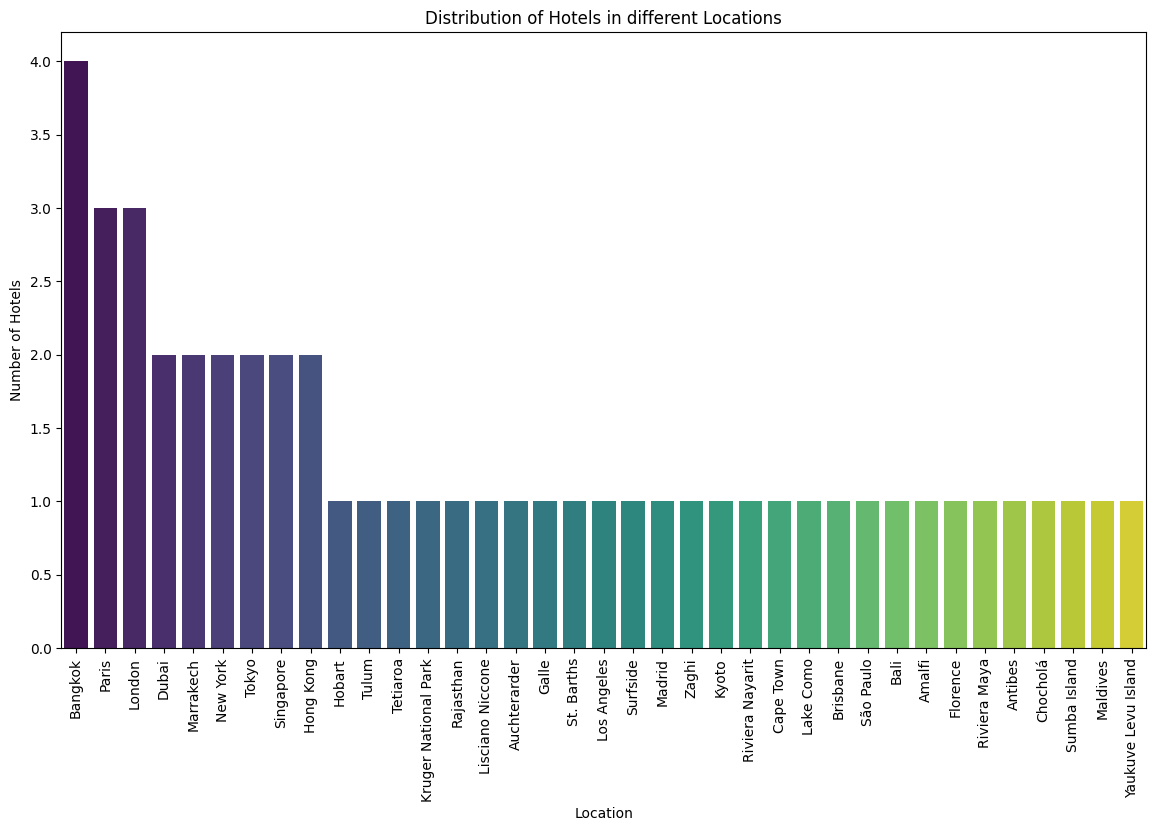

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x=Locations_counts.index, y=Locations_counts.values, color='red', palette ='viridis')
plt.xlabel('Location')
plt.ylabel('Number of Hotels')
plt.title('Distribution of Hotels in different Locations')
plt.xticks(rotation=90)
plt.show()

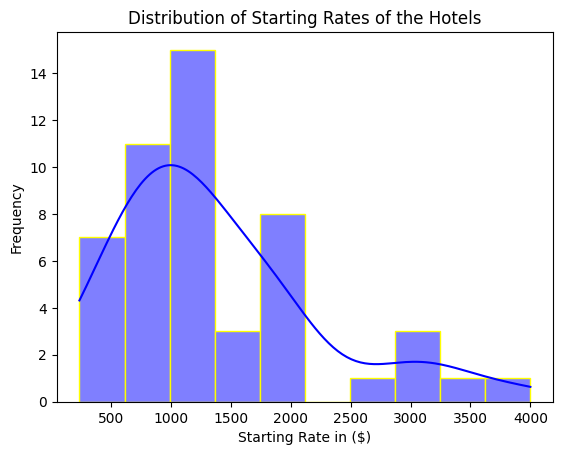

In [ ]:
plt.figure(frameon=False)
plt.figure(figsize=(14,8))
sns.histplot(df['Starting Rate in ($)'],kde=True, bins=10, edgecolor='yellow',color='blue',) # remove frameon=False
plt.xlabel('Starting Rate in ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Starting Rates of the Hotels')
plt.show()

In [ ]:
ammenities =df['Hotel Ammenties'].str.split(',', expand=True).stack().value_counts()
print(ammenities.head(5))

fitness centre         33
spa/wellness centre    31
family friendly        30
Swimming pool(s)       29
pet friendly           19
Name: count, dtype: int64


In [ ]:
ammenties = df['Hotel Ammenties'].str.split(', ').explode().str.strip()
print(ammenties.value_counts())
ammenties_counts= ammenties.value_counts()

Hotel Ammenties
fitness centre                                              33
spa/wellness centre                                         31
family friendly                                             30
Swimming pool(s)                                            29
pet friendly                                                19
Spa/wellness centre                                         15
Fitness centre                                              14
Beach                                                       14
swimming pool(s)                                            11
Family friendly                                             10
Pet friendly                                                 6
Gardens                                                      2
Swimming pool                                                2
Skyblaze fountain                                            1
Outdoor pursuits                                             1
Tennis Courts                          

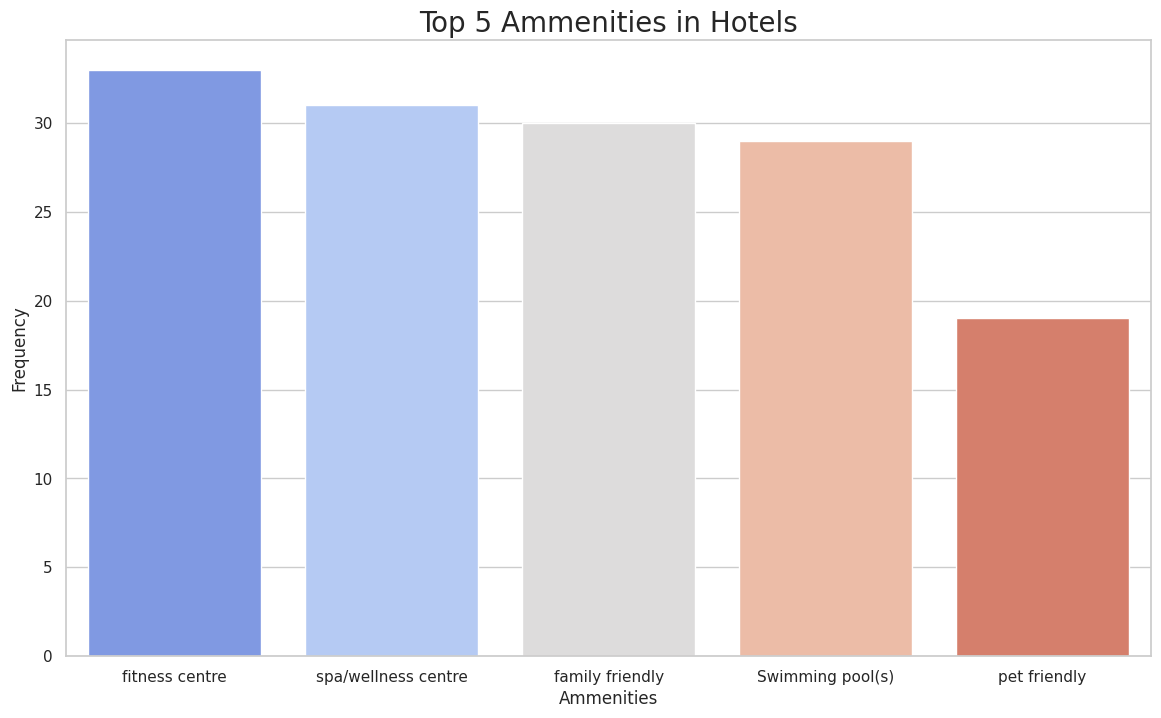

In [ ]:
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
sns.barplot(x=ammenties_counts.index[:5],y=ammenties_counts.values[:5], palette='coolwarm')
plt.xlabel('Ammenities')
plt.ylabel('Frequency')
plt.title('Top 5 Ammenities in Hotels', fontsize=20)
plt.xticks(rotation='horizontal')
plt.show()

In [ ]:
avg_rooms =df.groupby('Location')['Total Rooms'].mean().sort_values(ascending=False)
print(avg_rooms)

Location
Dubai                   510.000000
Hong Kong               265.000000
Auchterarder            232.000000
Bali                    225.000000
Madrid                  200.000000
Cape Town               198.000000
Bangkok                 192.250000
Brisbane                175.000000
London                  170.333333
São Paulo               160.000000
Hobart                  152.000000
New York                137.500000
Marrakech               131.000000
Paris                   128.666667
Florence                116.000000
Singapore               113.500000
Antibes                 111.000000
Riviera Nayarit         105.000000
Los Angeles             103.000000
Surfside                102.000000
Tokyo                    91.000000
Zaghi                    82.000000
Maldives                 72.000000
Riviera Maya             72.000000
Kyoto                    70.000000
Amalfi                   52.000000
Tulum                    51.000000
Chocholá                 40.000000
St. Barths 

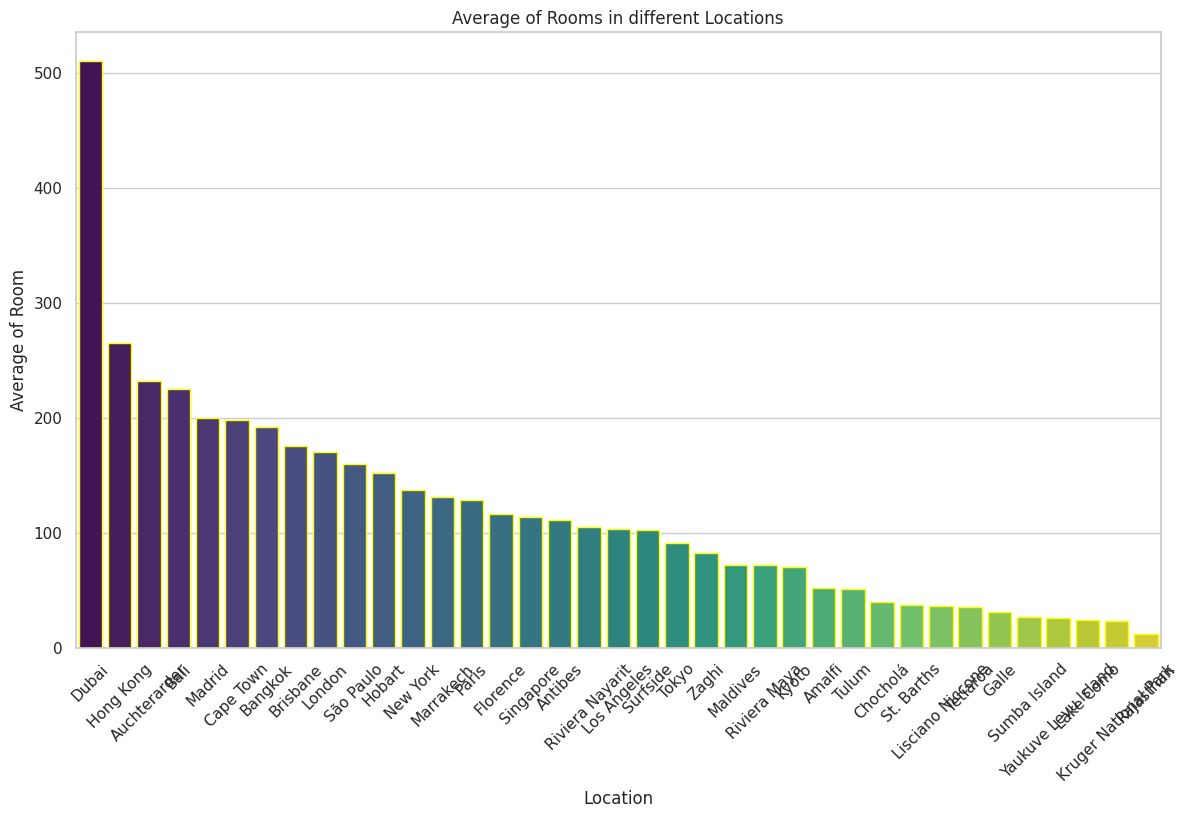

In [ ]:
plt.figure(figsize=(14,8))
sns.set(style='whitegrid')
sns.barplot(x=avg_rooms.index, y=avg_rooms.values, edgecolor='yellow', palette='viridis')
plt.xlabel('Location')
plt.ylabel('Average of Room')
plt.title('Average of Rooms in different Locations')
plt.xticks(rotation=45)
plt.show()
